## NAMA : A. Fuad Ahsan Basir
## NIM : H071201076
## Kelas : Machine Learning

# Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Data Exploration

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [4]:
train.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
cols_cat = ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
cols_cat

['education',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

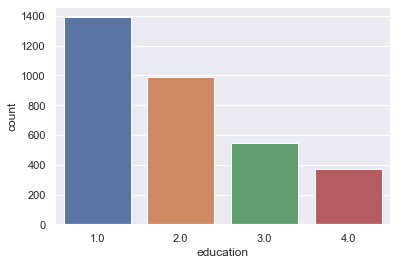

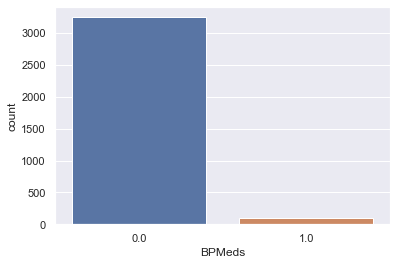

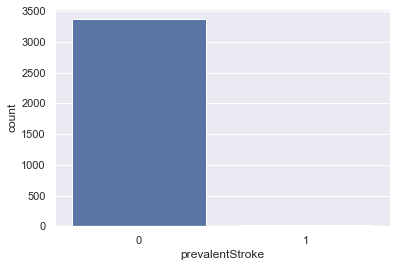

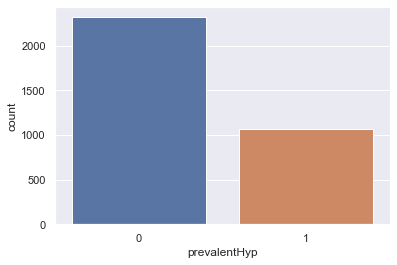

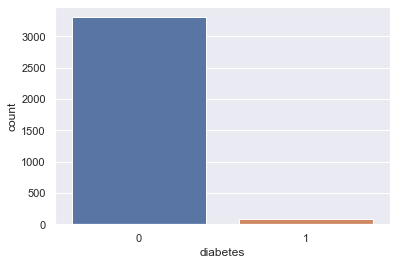

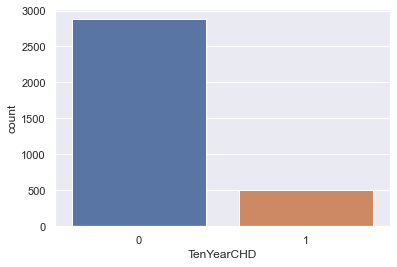

In [6]:
for i in cols_cat:
    plt.figure()
    sns.countplot(x=train[i])

In [7]:
col = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
col

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

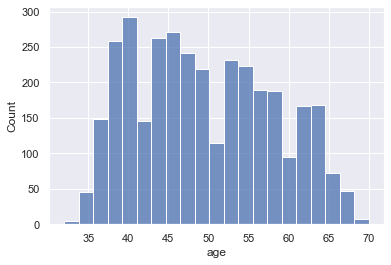

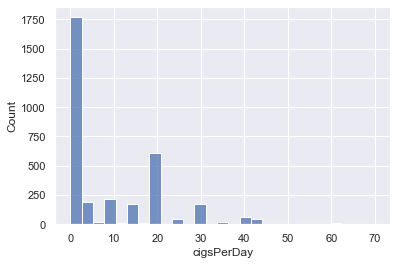

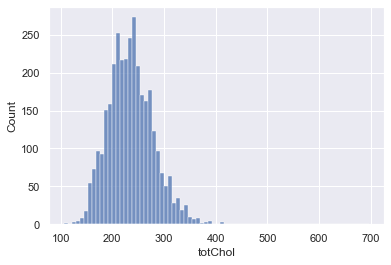

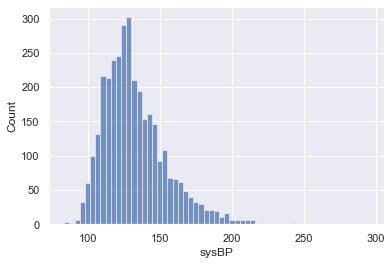

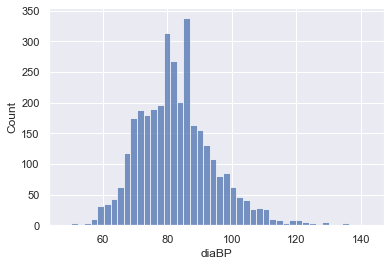

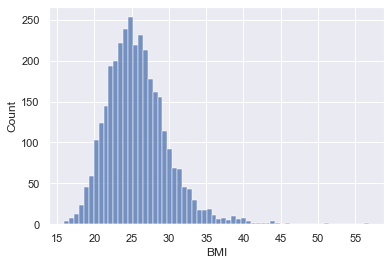

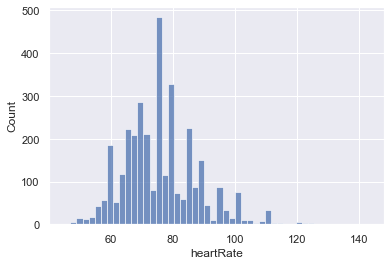

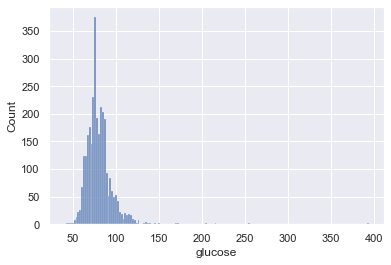

In [8]:
for i in col:
    plt.figure()
    sns.histplot(data=train, x=i)

## Missing Value

In [9]:
train.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

train.education = imputer.fit_transform(train['education'].values.reshape(-1,1))[:,0]
train.BPMeds = imputer.fit_transform(train['BPMeds'].values.reshape(-1,1))[:,0]

In [11]:
imputer = imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

train.cigsPerDay = imputer.fit_transform(train['cigsPerDay'].values.reshape(-1,1))[:,0]
train.totChol = imputer.fit_transform(train['totChol'].values.reshape(-1,1))[:,0]
train.BMI = imputer.fit_transform(train['BMI'].values.reshape(-1,1))[:,0]
train.heartRate = imputer.fit_transform(train['heartRate'].values.reshape(-1,1))[:,0]
train.glucose = imputer.fit_transform(train['glucose'].values.reshape(-1,1))[:,0]

In [12]:
train.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Data Cleaning

In [13]:
train = train.drop(['id'], axis=1)

## sum(train.duplicated())

## Label Encoding

In [15]:
cat_columns = train.columns[(train.dtypes =='object').values].tolist()
cat_columns

['sex', 'is_smoking']

In [16]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        train[col] = LabelEncoder().fit_transform(train[col])
train.head() 

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


## Feature Selection

In [17]:
X = train.drop(['TenYearCHD'], axis=1)
y = train['TenYearCHD']

In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [19]:
X_minmax

array([[0.84210526, 0.33333333, 0.        , ..., 0.24081696, 0.45918367,
        0.11299435],
       [0.10526316, 1.        , 1.        , ..., 0.33814887, 0.2755102 ,
        0.09887006],
       [0.36842105, 0.        , 0.        , ..., 0.10749265, 0.43877551,
        0.15254237],
       ...,
       [0.31578947, 0.66666667, 1.        , ..., 0.31733595, 0.28571429,
        0.09039548],
       [0.73684211, 0.        , 1.        , ..., 0.17262488, 0.35714286,
        0.12711864],
       [0.57894737, 0.66666667, 0.        , ..., 0.34084231, 0.34693878,
        0.14689266]])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Training Models

In [55]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print('Decision Tree Model Accuracy : ', dtc.score(X_test, y_test)*100, '%')

prediction = dtc.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  74.48377581120944 %

Confusion matrix :
[[485 103]
 [ 70  20]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       588
           1       0.16      0.22      0.19        90

    accuracy                           0.74       678
   macro avg       0.52      0.52      0.52       678
weighted avg       0.78      0.74      0.76       678



In [69]:
y_lr_predict_pro=dtc.predict_proba(X_test)[:,1]

0.5235260770975058

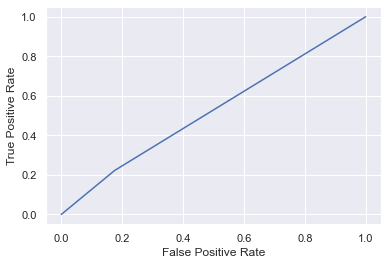

In [70]:
plot_roc_curve(y_test, y_lr_predict_pro)
roc_auc_score(y_test,y_lr_predict_pro)

## XGBoost

In [71]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test, y_test)*100, '%')

prediction = XGB_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

XGBoost Model Accuracy :  85.84070796460178 %

Confusion matrix :
[[567  21]
 [ 75  15]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       588
           1       0.42      0.17      0.24        90

    accuracy                           0.86       678
   macro avg       0.65      0.57      0.58       678
weighted avg       0.82      0.86      0.83       678



In [72]:
y_lr_predict_pro=XGB_model.predict_proba(X_test)[:,1]

0.6171201814058956

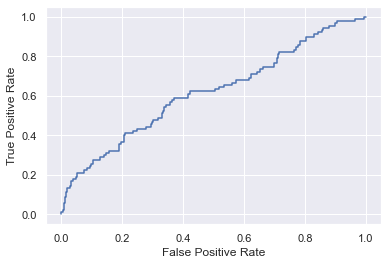

In [73]:
plot_roc_curve(y_test, y_lr_predict_pro)
roc_auc_score(y_test,y_lr_predict_pro)

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(fit_intercept=True, max_iter=10000)
log.fit(X_train, y_train)

print('Logistic Model Accuracy : ', log.score(X_test, y_test)*100, '%')

prediction = log.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  87.75811209439527 %

Confusion matrix :
[[588   0]
 [ 83   7]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       588
           1       1.00      0.08      0.14        90

    accuracy                           0.88       678
   macro avg       0.94      0.54      0.54       678
weighted avg       0.89      0.88      0.83       678



In [75]:
y_lr_predict_pro=log.predict_proba(X_test)[:,1]

0.7265117157974301

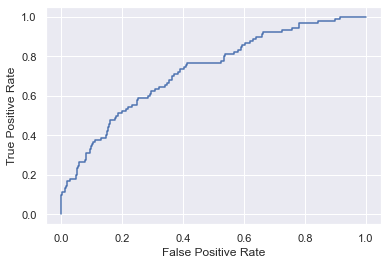

In [76]:
plot_roc_curve(y_test, y_lr_predict_pro)
roc_auc_score(y_test,y_lr_predict_pro)

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Random Forest Model Accuracy : ', rfc.score(X_test, y_test)*100, '%')

prediction = rfc.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  87.16814159292035 %

Confusion matrix :
[[585   3]
 [ 84   6]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       588
           1       0.67      0.07      0.12        90

    accuracy                           0.87       678
   macro avg       0.77      0.53      0.53       678
weighted avg       0.85      0.87      0.82       678



In [29]:
y_lr_predict_pro=rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_lr_predict_pro)

0.6609315948601663

## Cat Boost

In [30]:
from catboost import CatBoostClassifier

ctb_model = CatBoostClassifier(verbose=0, n_estimators=400)

ctb_model.fit(X_train, y_train)

print('CatBoost Model Accuracy : ', ctb_model.score(X_test, y_test)*100, '%')

prediction = ctb_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

CatBoost Model Accuracy :  86.4306784660767 %

Confusion matrix :
[[577  11]
 [ 81   9]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       588
           1       0.45      0.10      0.16        90

    accuracy                           0.86       678
   macro avg       0.66      0.54      0.54       678
weighted avg       0.82      0.86      0.82       678



In [31]:
y_lr_predict_pro=ctb_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_lr_predict_pro)

0.6869047619047618